# Analisi di un catalogo di ammassi di galassie

In questo esercizio viene analizzato un catalogo di ammassi di galassie (`euclid_ammassi.csv`) con caratteristiche simili a quelli che saranno osservati dalla missione Euclid. Il catalogo fornisce la massa (in masse solari) di ogni ammasso per un totale di tre valori di redshift e il volume di universo associato a ciascuno di essi (in ${Mpc}^3/h^3$).

## Parte uno: visualizzazione e analisi dei dati

In [4]:
import pandas as pd
euclid_ammassi = pd.read_csv('euclid_ammassi.csv', index_col = 0)
euclid_ammassi

,mass,z,vol
0,1.060613e+14,0.506,1.479387e+10
1,1.097076e+14,0.506,1.479387e+10
2,1.588869e+14,0.506,1.479387e+10
3,1.336345e+14,0.506,1.479387e+10
4,3.078288e+14,0.506,1.479387e+10
...,...,...,...
362632,1.002043e+14,1.500,9.112247e+10
362633,1.267961e+14,1.500,9.112247e+10
362634,1.273208e+14,1.500,9.112247e+10
362635,1.093178e+14,1.500,9.112247e+10


In [5]:
euclid_ammassi.groupby('z').head()
euclid_ammassi.groupby('z').tail()

,mass,z,vol
168892,1.085008e+14,0.506,1.479387e+10
168893,2.131142e+14,0.506,1.479387e+10
168894,1.401876e+14,0.506,1.479387e+10
168895,3.313962e+14,0.506,1.479387e+10
168896,1.605784e+14,0.506,1.479387e+10
310899,1.195896e+14,1.019,4.783826e+10
310900,1.005500e+14,1.019,4.783826e+10
310901,2.754929e+14,1.019,4.783826e+10
310902,1.367388e+14,1.019,4.783826e+10
310903,1.096074e+14,1.019,4.783826e+10


In [6]:
euclid_ammassi.groupby('z')['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
z,,,,,,,,
0.506,168897.0,1.754502e+14,1.022009e+14,1.000004e+14,1.162374e+14,1.417421e+14,1.942476e+14,2.231156e+15
1.019,142007.0,1.520161e+14,6.478489e+13,1.000036e+14,1.120814e+14,1.307558e+14,1.668826e+14,1.536768e+15
1.500,51733.0,1.370772e+14,4.304113e+13,1.000017e+14,1.093389e+14,1.230673e+14,1.487753e+14,9.605430e+14


In [7]:
euclid_ammassi.groupby('vol')['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
vol,,,,,,,,
1.479387e+10,168897.0,1.754502e+14,1.022009e+14,1.000004e+14,1.162374e+14,1.417421e+14,1.942476e+14,2.231156e+15
4.783826e+10,142007.0,1.520161e+14,6.478489e+13,1.000036e+14,1.120814e+14,1.307558e+14,1.668826e+14,1.536768e+15
9.112247e+10,51733.0,1.370772e+14,4.304113e+13,1.000017e+14,1.093389e+14,1.230673e+14,1.487753e+14,9.605430e+14


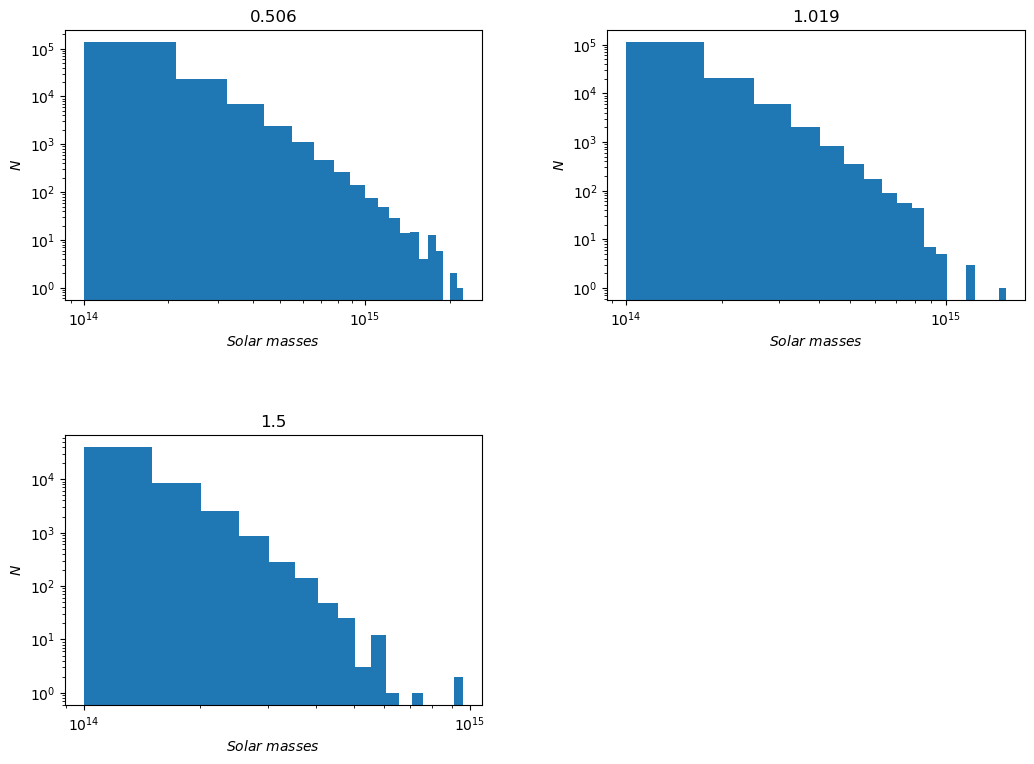

In [8]:
import matplotlib.pyplot as plt
axes = euclid_ammassi.hist(['mass'], 'z', xrot = 0, figsize = (12, 9), bins = 'sturges')
for ax in axes.flatten():
    ax.set(xlabel = '$Solar\ masses$', ylabel = '$N$')
    ax.loglog()
plt.show()

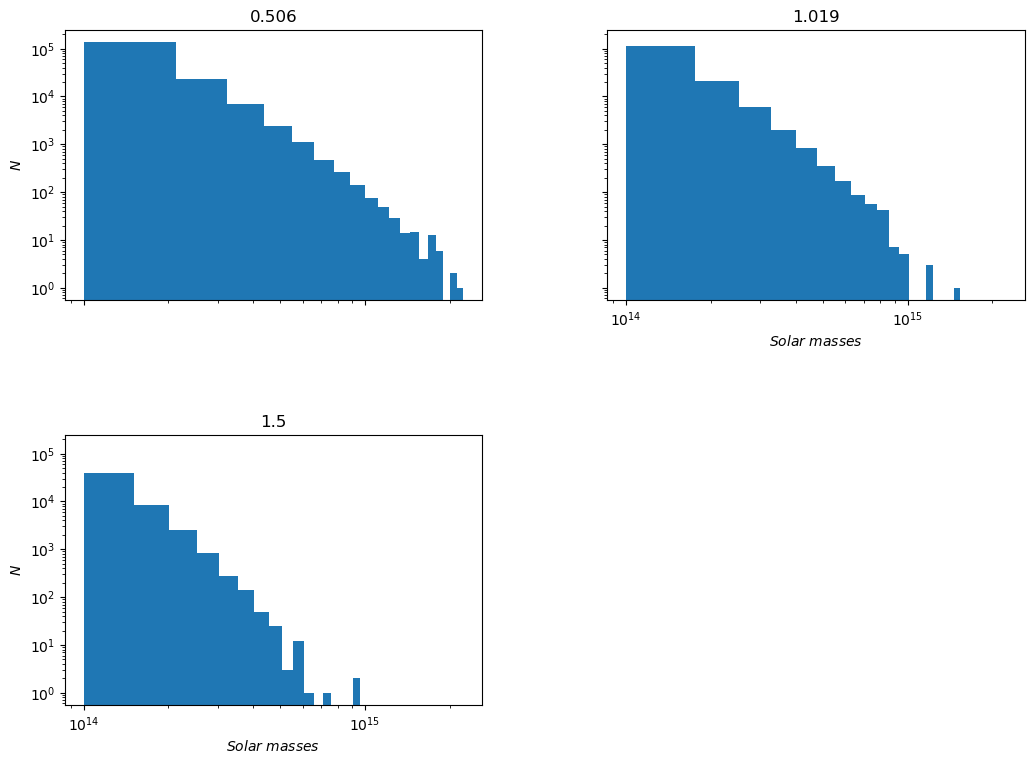

In [9]:
import matplotlib.pyplot as plt
axes = euclid_ammassi.hist(['mass'], 'z', xrot = 0, sharex = True, sharey = True, figsize = (12, 9), bins = 'sturges')
for ax in axes.flatten():
    ax.set(xlabel = '$Solar\ masses$', ylabel = '$N$')
    ax.loglog()
plt.show()

## Parte due: analisi della Halo Mass Function (HMF)

In [11]:
ec0 = euclid_ammassi.drop(euclid_ammassi[euclid_ammassi['z'] != 1.019].index) 

In [177]:
import numpy as np

z = [0.506, 1.019, 1.500]

ec0 = euclid_ammassi.drop(euclid_ammassi[euclid_ammassi['z'] != z[0]].index)
ec1 = euclid_ammassi.drop(euclid_ammassi[euclid_ammassi['z'] != z[1]].index) 
ec2 = euclid_ammassi.drop(euclid_ammassi[euclid_ammassi['z'] != z[2]].index) 

mass = [np.sort(ec0['mass']), np.sort(ec1['mass']), np.sort(ec2['mass'])]
vol = [ec0['vol'].mean(), ec1['vol'].mean(), ec2['vol'].mean()]

In [321]:
from colossus.cosmology import cosmology
params = {'flat': True, 'H0': 67.7, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95}
cosmology.addCosmology('myCosmo', params)
cosmo = cosmology.setCosmology('myCosmo')

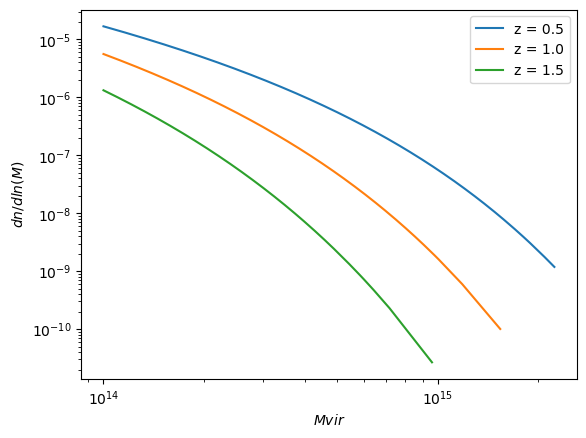

In [181]:
from colossus.lss import mass_function

plt.figure()
plt.xlabel('$Mvir$')
plt.ylabel('$dn/dln(M)$')
plt.loglog()
for i in range(len(z)):
    mfunc = mass_function.massFunction(mass[i], z[i], mdef = 'vir', 
                                       model = 'despali16', q_out = 'dndlnM')
    plt.plot(mass[i], mfunc, label = 'z = %.1f' % (z[i]))
plt.legend()
plt.show()

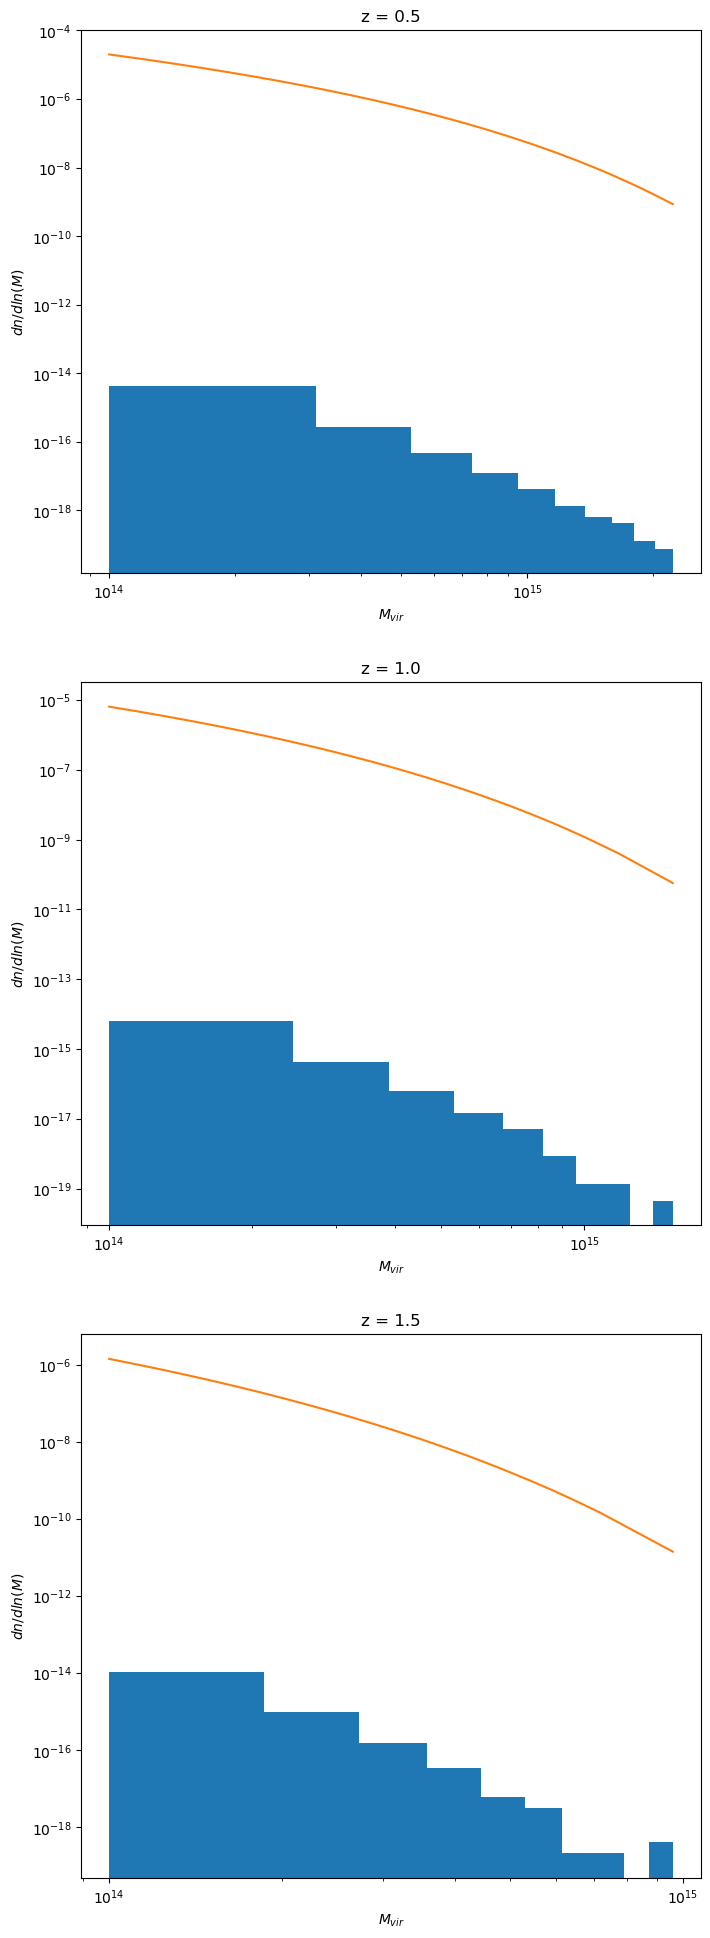

In [381]:
fig, (ax0, ax1, ax2) = plt.subplots(3, figsize = (8, 24))
axes = [ax0, ax1, ax2]
for i in range(len(z)):
    axes[i].set(xlabel = r'$M_{vir}$', xscale = 'log',
               ylabel = r'$dn/dln(M)$', yscale = 'log', 
               title = 'z = %.1f' % (z[i]))
    axes[i].hist(mass[i], weights = 1/np.log(mass[i]), density = True)
    mfunc = mass_function.massFunction(mass[i], z[i], mdef = 'vir', 
                                      model = 'despali16', q_out = 'dndlnM')
    axes[i].plot(mass[i], mfunc)
plt.show()

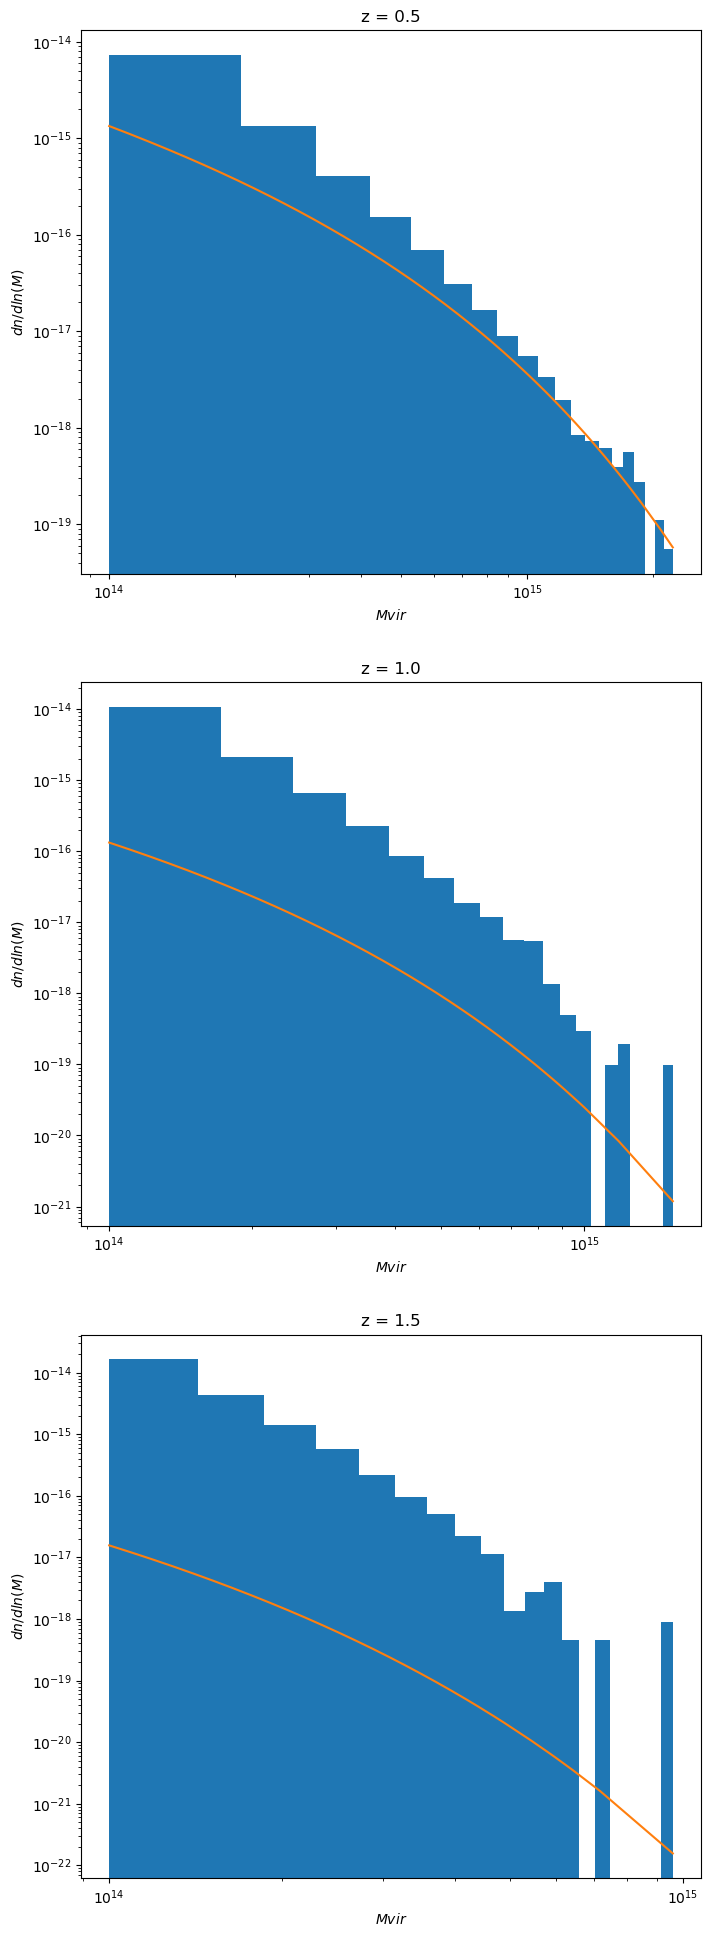

In [371]:
fig, (ax0, ax1, ax2) = plt.subplots(3, figsize = (8, 24))
axes = [ax0, ax1, ax2]
for i in range(len(z)):
    axes[i].set(xlabel = '$Mvir$', xscale = 'log',
                ylabel = '$dn/dln(M)$', yscale = 'log',
                title = 'z = %.1f' % (z[i]))
    axes[i].hist(mass[i], bins = 20, density = True)
    mfunc = mass_function.massFunction(mass[i], z[i], mdef = 'vir', 
                                       model = 'despali16', q_out = 'dndlnM')
    axes[i].plot(mass[i], mfunc/vol[i])
plt.show()

In [367]:
np.exp(0.2)

1.2214027581601699

## Parte tre: inferenza bayesiana sui parametri cosmologici

### Modelli flat $\Lambda$CDM

In [171]:
from colossus.cosmology import cosmology
from colossus.lss import mass_function
from scipy.stats import poisson

def log_prior(theta):
    sigma8, Om0 = theta
    if 0.1 <= sigma8 <= 1.1 and 0.1 <= Om0 <= 1.1:
        return 0.0
    return -np.inf

def log_likelihood(theta, M, z):
    Om0, sigma8 = theta
    params = {'flat': True, 'H0': 67.7, 'Om0': Om0, 
              'Ob0': 0.049, 'sigma8': sigma8, 'ns': 0.95}
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')
    counts, bin_edges = np.histogram(M, bins = 'sturges')
    bin_centers = np.ones(len(bin_edges) - 1)
    for i in range(len(bin_centers)):
        bin_centers[i] = bin_edges[i + 1] - 0.5 * (bin_edges[1] - bin_edges[0])
    mfunc = mass_function.massFunction(bin_centers, z, mdef = 'vir',
                                      model = 'despali16', q_out = 'dndlnM')
    return np.nansum(np.log(poisson.pmf(counts, mfunc)))

def log_post(theta, M, z):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, M, z)

In [18]:
from colossus.cosmology import cosmology
from colossus.lss import mass_function

def log_prior(theta):
    sigma8, Om0 = theta
    if 0.1 <= sigma8 <= 1.1 and 0.1 <= Om0 <= 1.1:
        return 0.0
    return -np.inf

def log_likelihood(theta, M, z):
    Om0, sigma8 = theta
    params = {'flat': True, 'H0': 67.7, 'Om0': Om0, 
              'Ob0': 0.049, 'sigma8': sigma8, 'ns': 0.95}
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')
    mfunc = mass_function.massFunction(M, z, mdef = 'vir',
                                      model = 'despali16', q_out = 'dndlnM')
    return np.nansum(np.log(mfunc))

def log_post(theta, M, z):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, M, z)

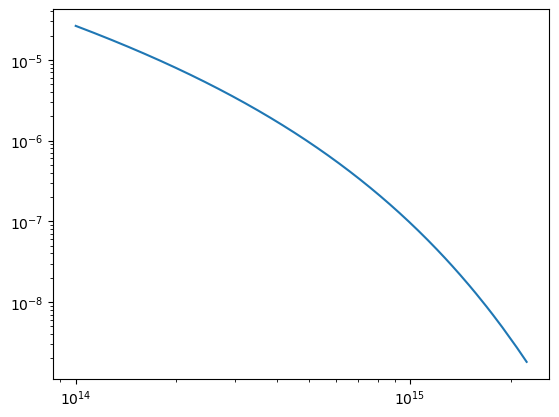

In [19]:
theta = np.array([0.31, 0.81]) + 0.1 * np.random.randn(2)
Om0, sigma8 = theta
params = {'flat': True, 'H0': 67.7, 'Om0': Om0, 
          'Ob0': 0.049, 'sigma8': sigma8, 'ns': 0.95}
cosmology.addCosmology('myCosmo', params)
cosmo = cosmology.setCosmology('myCosmo')
mfunc = mass_function.massFunction(M[0], z[0], mdef = 'vir', 
                                   model = 'despali16', q_out = 'dndlnM')
plt.plot(M[0], mfunc)
plt.loglog()
plt.show()

In [20]:
theta = np.array([0.31, 0.81]) + 0.1 * np.random.randn(2)
print(M[0], z[0])

[1.00000407e+14 1.00001142e+14 1.00001728e+14 ... 2.05190014e+15
 2.08650124e+15 2.23115591e+15] 0.506


In [21]:
x = np.linspace(0.3, 0.8, 10)
y = np.linspace(0.3, 0.8, 10)
def f(x, y):
    return log_post([x, y], M[0], z[0])
F = np.zeros((len(x), len(y)))
for j in range (len(x)):
    for i in range(len(y)):
        F[i][j] = f(x[j], y[i]) 
G = F.flatten()

In [22]:
print(G)

[-4709696.04404278 -4546670.40277906 -4395161.97584196 -4253910.96789658
 -4122216.08184178 -3998832.86670558 -3883051.55849686 -3774188.43916596
 -3671520.12753654 -3574694.13288553 -3778086.98405052 -3652506.01576187
 -3536670.07997594 -3429261.56332576 -3329517.37613811 -3236365.22865783
 -3149171.79232601 -3067355.23661022 -2990326.33687038 -2917785.06825424
 -3203385.75522109 -3101115.8270677  -3007487.36631928 -2921146.7775786
 -2841292.52516571 -2766959.5168812  -2697562.03070756 -2632581.68612015
 -2571512.79308425 -2514088.01052431 -2825581.42943709 -2738798.4050294
 -2659923.45127764 -2587579.07746635 -2520938.22368793 -2459107.03043982
 -2401531.42066532 -2347735.18327637 -2297268.13766916 -2249884.67315977
 -2565069.56867243 -2489094.20832194 -2420514.92545109 -2357937.56156814
 -2300517.25867897 -2247409.87964464 -2198083.44481708 -2152091.18408458
 -2109021.66453223 -2068644.4535099  -2378654.36193442 -2310517.60132477
 -2249405.42701554 -2193911.59805692 -2143178.3594605

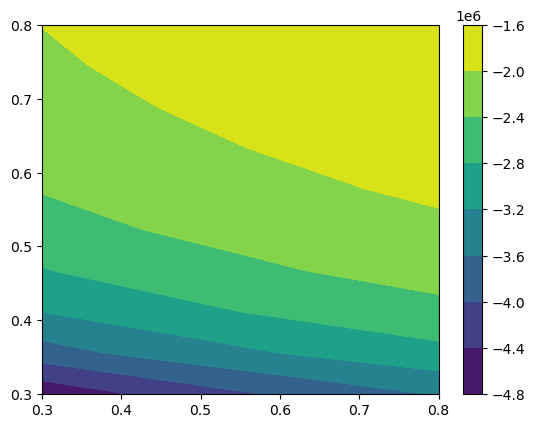

In [23]:
plt.contourf(x, y, F)
plt.colorbar()

In [24]:
from scipy.optimize import minimize
from numpy import random

nlp = lambda *args: -log_post(*args)
Om0 = 0.31
sigma8 = 0.81
p0 = np.array([Om0, sigma8]) * 0.1 * np.random.randn(2)
bf_params = minimize(nlp, p0, args = (M[2], z[2]))
print(bf_params)

  message: NaN result encountered.
  success: False
   status: 3
      fun: inf
        x: [ 5.624e-02 -2.939e-02]
      nit: 0
      jac: [       nan        nan]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 3
     njev: 1


/home/27b0916a-139a-49fa-93f8-7aeeadbff515/.conda/envs/Colossus/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [25]:
import emcee

nparams = 2
nwalkers = 20
p0 = np.array([Om0, sigma8]) * 0.01 * np.random.randn(nwalkers, nparams)
sampler = emcee.EnsembleSampler(nwalkers, nparams, log_post, 
                               args = (M[2], z[2]))
sampler.run_mcmc(p0, 1000, progress = True)

  0%|          | 0/1000 [00:00<?, ?it/s]/home/27b0916a-139a-49fa-93f8-7aeeadbff515/.local/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:00<00:00, 1698.14it/s]


State([[ 0.00215565  0.00043749]
 [-0.0005268   0.00101008]
 [-0.00383978 -0.00548879]
 [-0.00163641 -0.00654523]
 [ 0.000305   -0.0070792 ]
 [-0.00097259 -0.01027874]
 [ 0.00257282  0.00376118]
 [-0.00325197  0.00170435]
 [-0.00054374  0.00400612]
 [-0.00129621 -0.00744689]
 [ 0.00049143 -0.00301246]
 [-0.00278616 -0.00589416]
 [-0.00063298 -0.02200921]
 [-0.00133497  0.00093736]
 [-0.00040641  0.00513272]
 [-0.00240859  0.00011633]
 [ 0.00208736  0.00270277]
 [-0.0086427   0.0216273 ]
 [ 0.00275523 -0.00512626]
 [ 0.00357811  0.02032319]], log_prob=[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf], blobs=None, random_state=('MT19937', array([  89974392,   95056934, 3991819242, 3905482749,   17926443,
       3260307717, 2801759589, 4191596614, 1342785400, 3104284423,
       2985253859, 2481596985, 2712399393,  513229277, 1828989273,
        285830891, 2245602830, 2228260590,  628576624,  230518710,
        731362980,  841709185, 428

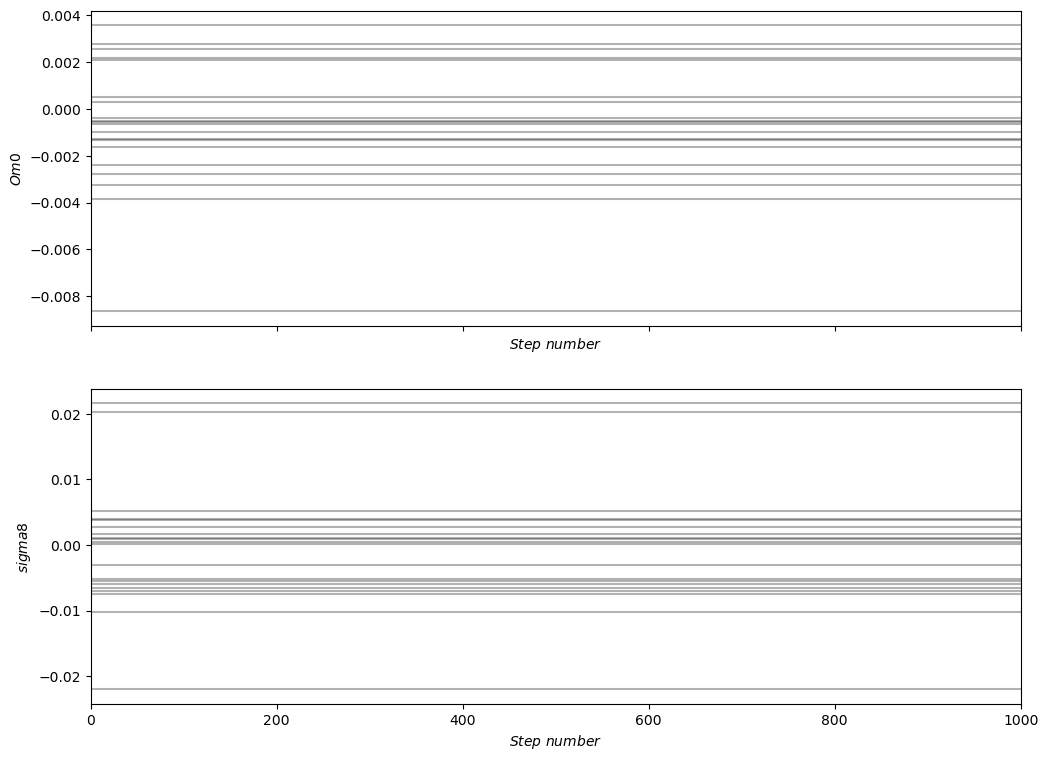

In [26]:
fig, axes = plt.subplots(2, figsize = (12, 9), sharex = True)
samples = sampler.get_chain()
labels = ['$Om0$', '$sigma8$']
for i in range(nparams):
    ax = axes[i]
    ax.plot(samples[:,:,i], 'k', alpha = 0.3)
    ax.set(xlim = (0, len(samples)), ylabel = labels[i], xlabel = '$Step\ number$')

In [27]:
flat_samples = sampler.get_chain(discard = 100, flat = True)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Ari

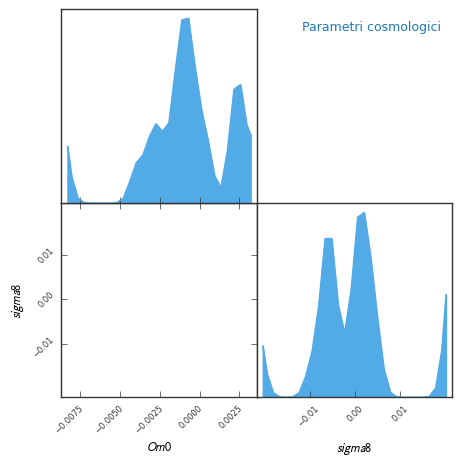

In [28]:
import pygtc
GTC = pygtc.plotGTC(chains = flat_samples,
                    paramNames = ['$Om0$','$sigma8$'],
                    chainLabels = ['Parametri cosmologici'],
                    figureSize = 'MNRAS_page')

### Curvatura dell'universo

In [30]:
from colossus.cosmology import cosmology
from colossus.lss import mass_function

def log_prior(theta):
    Ode0, Om0, sigma8 = theta
    if 0.1 <= sigma8 <= 1.1 and 0.1 <= Om0 <= 1.1:
        return 0.0
    return -np.inf

def log_likelihood(theta, M, z):
    Ode0, Om0, sigma8 = theta
    params = {'flat': False, 'H0': 67.7, 'Ode0': Ode0, 'Om0': Om0, 
              'Ob0': 0.049, 'sigma8': sigma8, 'ns': 0.95}
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')
    mfunc = mass_function.massFunction(M, z, mdef = 'vir',
                                      model = 'despali16', q_out = 'dndlnM')
    return np.nansum(np.log(mfunc))

def log_post(theta, M, z):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, M, z)

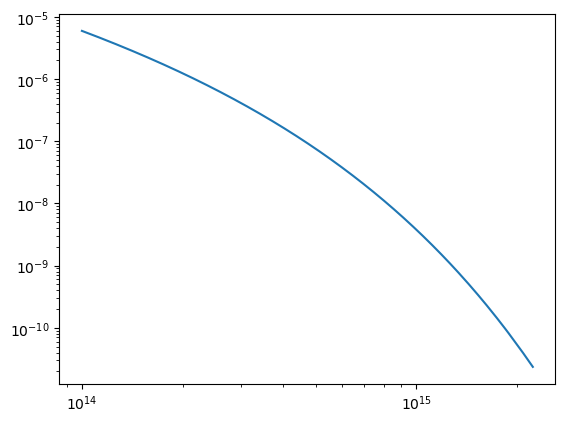

In [31]:
p0 = np.array([0.69, 0.31, 0.81]) + 0.1 * np.random.randn(3)
Ode0, Om0, sigma8 = p0
params = {'flat': True, 'H0': 67.7, 'Om0': Om0, 
          'Ob0': 0.049, 'sigma8': sigma8, 'ns': 0.95}
cosmology.addCosmology('myCosmo', params)
cosmo = cosmology.setCosmology('myCosmo')
mfunc = mass_function.massFunction(M[0], z[0], mdef = 'vir', 
                                   model = 'despali16', q_out = 'dndlnM')
plt.plot(M[0], mfunc)
plt.loglog()
plt.show()

In [32]:
from scipy.optimize import minimize
from numpy import random

bf_params = minimize(nlp, p0, args = (M[2], z[2]))
print(bf_params)

/home/27b0916a-139a-49fa-93f8-7aeeadbff515/.conda/envs/Colossus/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/27b0916a-139a-49fa-93f8-7aeeadbff515/.conda/envs/Colossus/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 760542.831219547
        x: [ 7.746e-01  1.096e+00  6.849e-01]
      nit: 2
      jac: [ 0.000e+00 -2.511e+05  0.000e+00]
 hess_inv: [[ 1.000e+00  0.000e+00  0.000e+00]
            [ 0.000e+00  2.980e-06  0.000e+00]
            [ 0.000e+00  0.000e+00  1.000e+00]]
     nfev: 37
     njev: 7


In [33]:
import emcee

nparams = 3
nwalkers = 20
p0 = np.array([Ode0, Om0, sigma8]) * 0.01 * np.random.randn(nwalkers, nparams)
sampler = emcee.EnsembleSampler(nwalkers, nparams, log_post, 
                               args = (M[2], z[2]))
sampler.run_mcmc(p0, 1000, progress = True)

  0%|          | 0/1000 [00:00<?, ?it/s]/home/27b0916a-139a-49fa-93f8-7aeeadbff515/.local/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:00<00:00, 1906.05it/s]


State([[-3.12819512e-03 -4.51273526e-04 -9.71743606e-03]
 [ 5.38927265e-03 -2.60336533e-03  1.55286669e-02]
 [ 3.32632901e-04 -2.30082445e-03  1.24662927e-02]
 [ 5.50389701e-03 -1.42403868e-03 -9.16477833e-03]
 [-3.82906874e-03  1.48441081e-03 -6.92577969e-03]
 [ 3.49061537e-03 -2.97710095e-03 -8.20818092e-03]
 [-1.93782838e-03  1.06047887e-03  1.85049492e-03]
 [ 8.77541559e-03  1.10464176e-03  4.22546845e-05]
 [-1.24986207e-02 -1.81058021e-03  5.96680503e-04]
 [ 1.08896537e-03 -3.75638237e-03 -4.36505560e-03]
 [-7.06997289e-03  1.10658403e-03 -1.00071214e-02]
 [ 1.24045402e-03  1.65620131e-03  9.14633894e-03]
 [-9.78100686e-03  6.25545861e-03  3.13942371e-03]
 [ 4.87919480e-03 -9.26675672e-04 -2.21303656e-04]
 [-5.37965148e-03 -2.99646044e-03 -5.02796539e-03]
 [-7.33028961e-03  2.34962098e-03  3.58601498e-03]
 [ 9.61838363e-03 -4.20186516e-03 -6.56403152e-03]
 [ 7.31509656e-04  1.92362476e-03 -1.57898026e-03]
 [ 7.42067370e-03 -4.07105399e-03  2.49001915e-03]
 [ 1.94301853e-02  2.1597

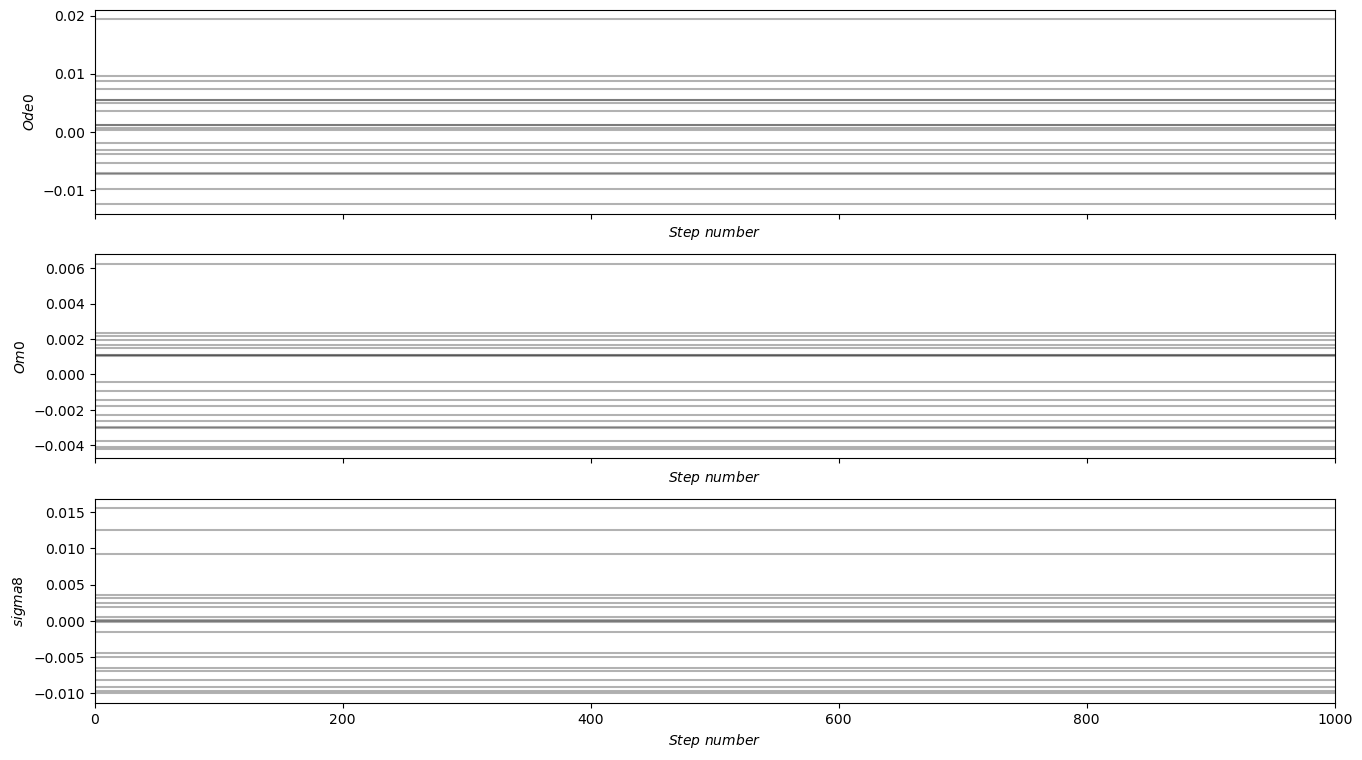

In [34]:
fig, axes = plt.subplots(3, figsize = (16, 9), sharex = True)
samples = sampler.get_chain()
names = ['$Ode0$', '$Om0$', '$sigma8$']
for i in range(nparams):
    ax = axes[i]
    ax.plot(samples[:,:,i], 'k', alpha = 0.3)
    ax.set(xlim = (0, len(samples)), ylabel = names[i], xlabel = '$Step\ number$')

In [35]:
flat_samples = sampler.get_chain(discard = 100, flat = True)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

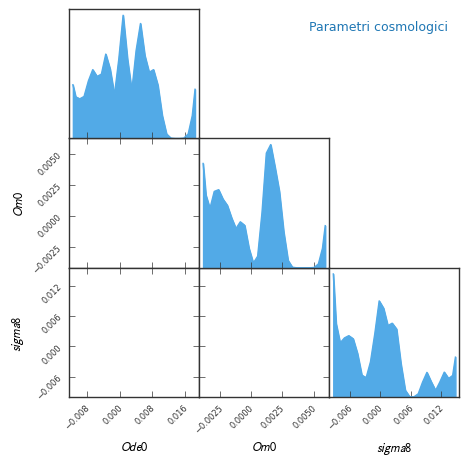

In [36]:
import pygtc
GTC = pygtc.plotGTC(chains = flat_samples,
                    paramNames = ['$Ode0$', '$Om0$','$sigma8$'],
                    chainLabels = ['Parametri cosmologici'],
                    figureSize = 'MNRAS_page')

In [37]:
samples.shape

(1000, 20, 3)

In [38]:
converged = samples[100:].reshape(-1, 3)
print(converged.shape)

(18000, 3)


0.9995736163038597 0.007190876959868983


(array([ 69.63964135,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         69.63964135,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  69.63964135,   0.        ,
        139.27928271,  69.63964135, 208.91892406,   0.        ,
          0.        ,  69.63964135,   0.        ,  69.63964135,
         69.63964135, 139.27928271,  69.63964135,  69.63964135,
          0.        ,  69.63964135,  69.63964135,   0.        ,
          0.        ,  69.63964135,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  69.63964135]),
 array([0.97841011, 0.97912809, 0.97984607, 0.98056405, 0.98128203,
        0.98200002, 0.982718  , 0.98343598, 0.98415396, 0.98487194,
        0.98558993, 0.98630791, 0.98702589, 0.98774387, 0.

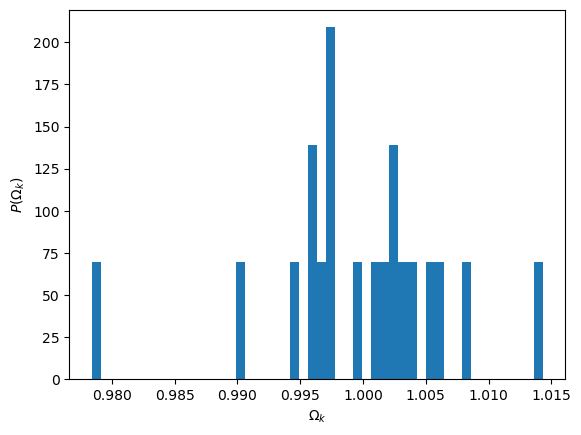

In [39]:
Ok0 = 1 - converged[:, 0] - converged[:, 1]
print(Ok0.mean(), Ok0.std())
plt.xlabel("$\Omega_k$")
plt.ylabel("$P(\Omega_k$)")
plt.hist(Ok0, bins=50, density=True)
# plt.vlines(0,0,3, colors="black", linestyles="dashed")